<a href="https://colab.research.google.com/github/vannika-degala/credit-card-fraud-prediction/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title : Predicting whether a customer will default on his/her credit card**

# Problem Description

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments

# Data Description

**Attribute Information:**

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.


In [ ]:
# importing liabraries
import numpy as np # for numeric calculation
import pandas as pd # for data analysis and manupulation
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for data visualization
import os
from dateutil import parser # convert time in date time data type
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel("/content/drive/MyDrive/credit card.xls")

In [ ]:
type(df)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.keys()

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# looking last 5 rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
df.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.shape

(30000, 25)

In [ ]:
df.isnull()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
df.rename(columns={'default payment next month' : 'Defaulter'}, inplace=True)

In [ ]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

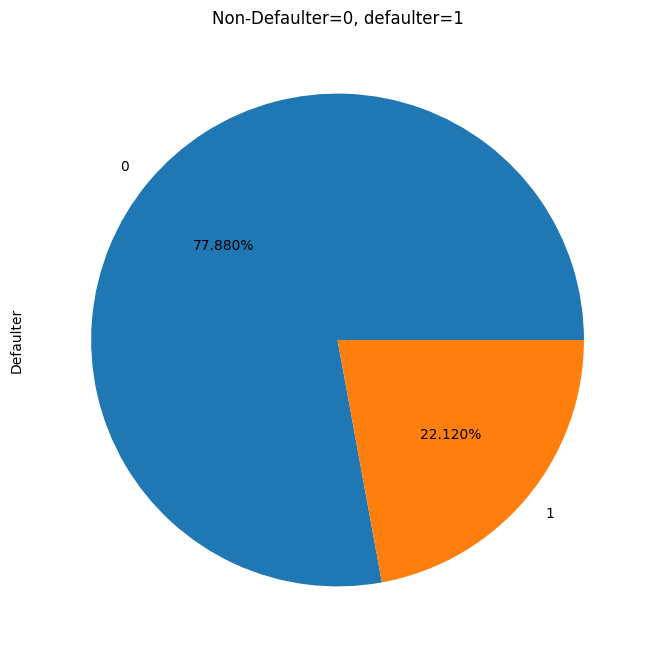

In [ ]:
df['Defaulter'].value_counts().plot(kind="pie",autopct='%1.3f%%',figsize=(8,8))
plt.title("Non-Defaulter=0, defaulter=1")
plt.show()

Inferance : From the above data we can conclude that

1.Non-defaulter were 23364, Defaulter were 6636


2.the above pie charts said Non-defaulters 77.88% ,and defaulter were 22.12%

In [ ]:
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

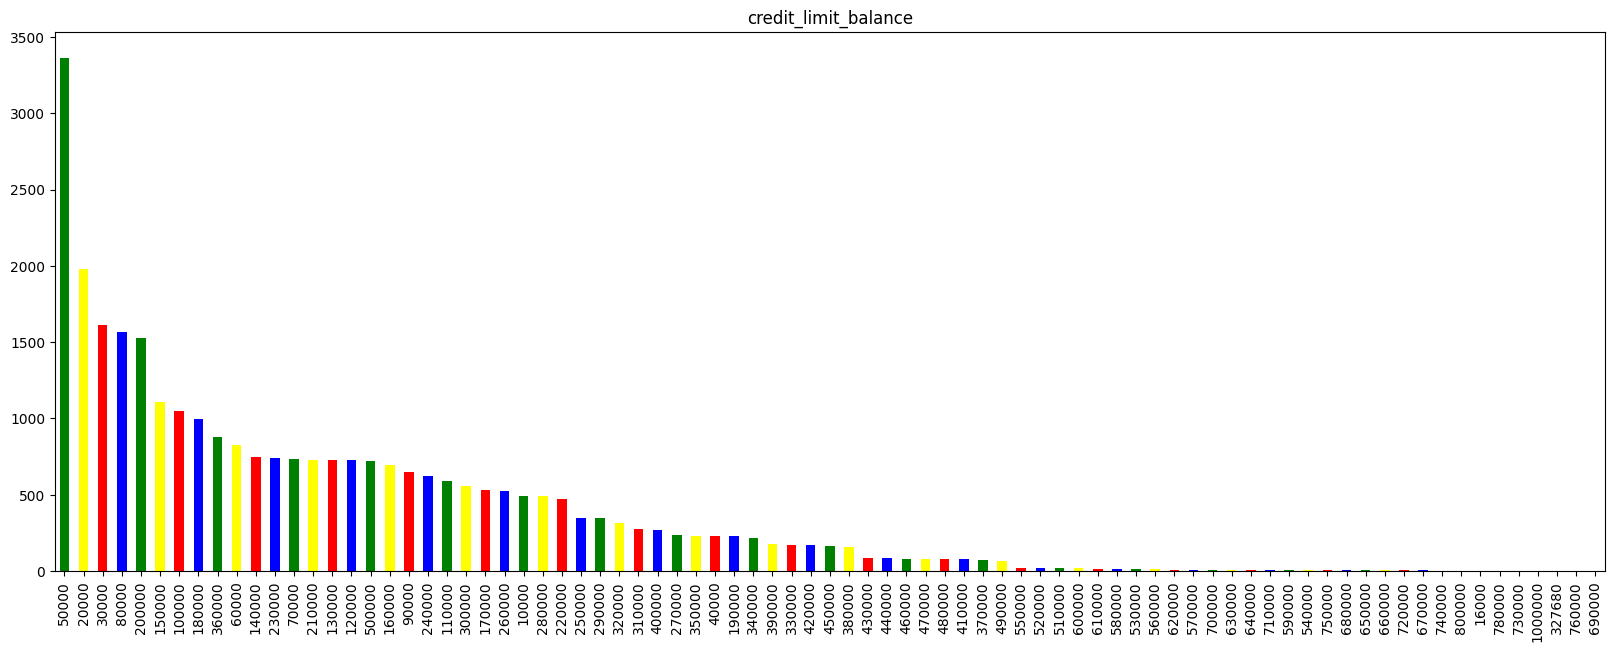

In [ ]:
plt.figure(figsize=(20,7))
df['LIMIT_BAL'].value_counts().plot(kind="bar",color={"blue","green","red","yellow"})
plt.title("credit_limit_balance")
plt.show()

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

From the above data we can conclude that most of people available credit balance is 50,000 to 3365 members

maximum available credit balance limit is 1,00,000

minimum available credit balance limit is 10,000

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

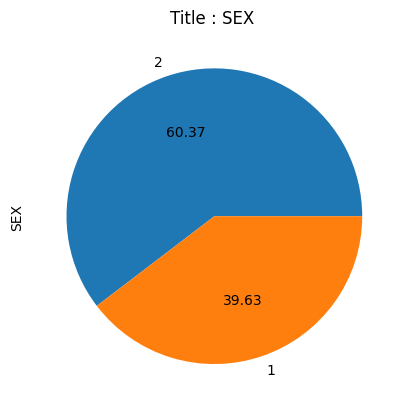

In [ ]:
df["SEX"].value_counts()[:10].plot(kind='pie',autopct='%.2f')
plt.title("Title : SEX ")
plt.show()

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

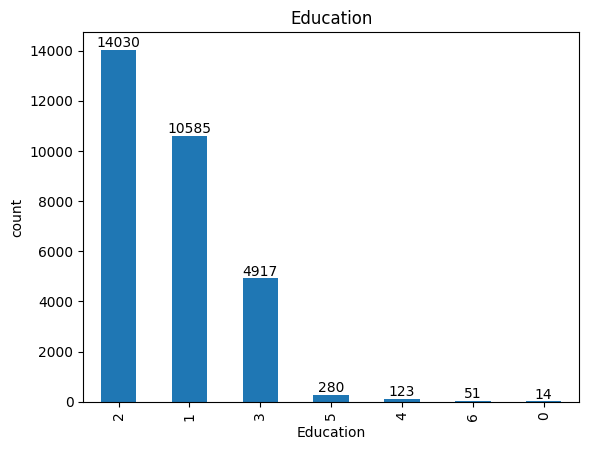

In [ ]:
ax=df['EDUCATION'].value_counts().plot(kind='bar')

for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

ax.set_xlabel('Education')

ax.set_ylabel("count")

ax.set_title('Education')
plt.xticks(rotation=90)
plt.show()

From the above data we can conclude that Education in

1.University by 14,030 people

2.graduate school by 10,585 people

3.graduate school by 4917 people

4.other studying by 468 people

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In our data describe about married persons represented with 1, singles represented with 2, others represented with 3, but out dataset include "0" but it tells about anything so we simply move to others category

In [ ]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})
df['MARRIAGE']

0        1
1        2
2        2
3        1
4        1
        ..
29995    1
29996    2
29997    2
29998    1
29999    1
Name: MARRIAGE, Length: 30000, dtype: int64

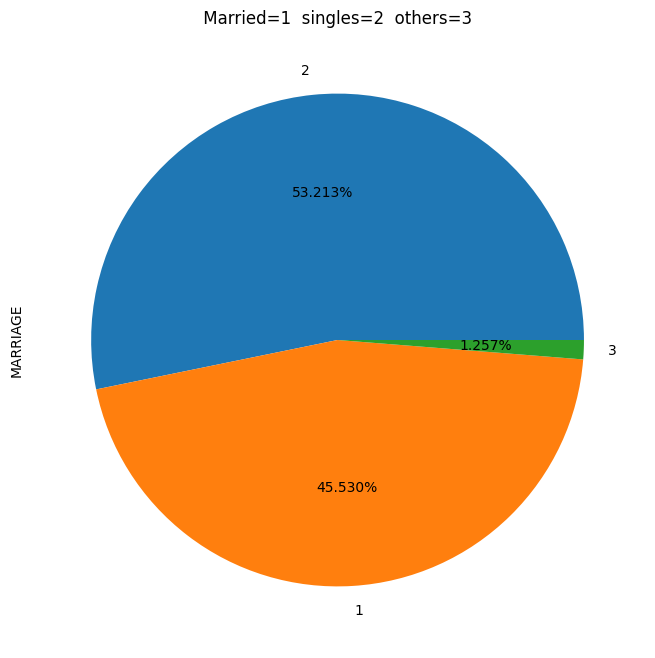

In [ ]:
df['MARRIAGE'].value_counts().plot(kind="pie",autopct='%1.3f%%',figsize=(8,8))
plt.title(" Married=1  singles=2  others=3 ")
plt.show()

From the above pie chart we can say that

1.married people were 45.53%
2.singles were 53.213%

3.others were 1.257%



In [ ]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

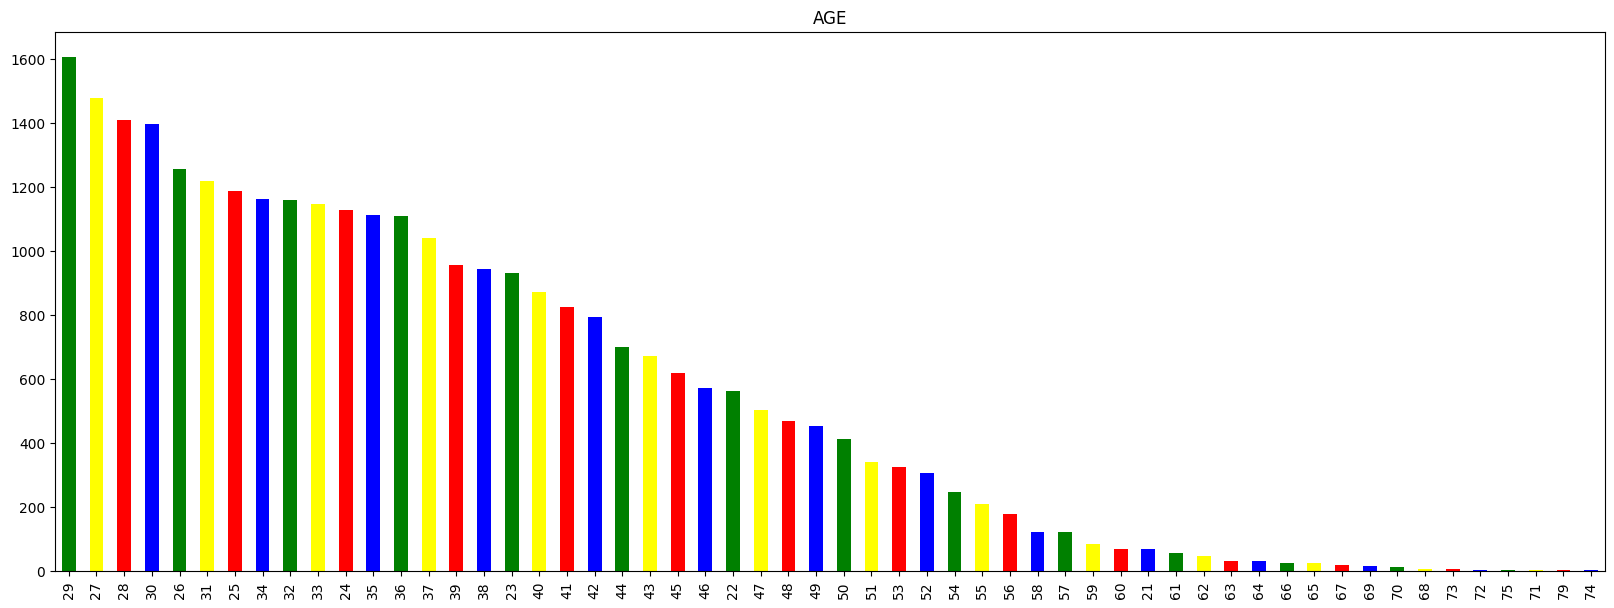

In [ ]:
plt.figure(figsize=(20,7))
df['AGE'].value_counts().plot(kind="bar",color={"blue","green","red","yellow"})
plt.title("AGE")
plt.show()

1.From the above data we can conclude that 1.most of credit cardholders AGE was 25-45 and above age 60 people are used rarely creditcards

2.most of 29th age people used huge credit cards that number is 1605 and second place was 27th age people it's number 1477

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# renameing column Names


df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
len(df[df.duplicated()])


0

we don't have any doplicates in our dataset

In [ ]:
print(df['BILL_AMT_APR'].value_counts())
print("\n")
print("\n")


print(df['BILL_AMT_MAY'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JUN'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JUL'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_AUG'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_SEPT'].value_counts())

0         4020
390        207
780         86
150         78
316         77
          ... 
26852        1
108660       1
480          1
15298        1
15313        1
Name: BILL_AMT_APR, Length: 20604, dtype: int64




0        3506
390       235
780        94
316        79
326        62
         ... 
19341       1
66726       1
80682       1
28508       1
32428       1
Name: BILL_AMT_MAY, Length: 21010, dtype: int64




0         3195
390        246
780        101
316         68
326         62
          ... 
97189        1
118839       1
23567        1
18377        1
36535        1
Name: BILL_AMT_JUN, Length: 21548, dtype: int64




0         2870
390        275
780         74
326         63
316         62
          ... 
19580        1
45129        1
227807       1
39330        1
49764        1
Name: BILL_AMT_JUL, Length: 22026, dtype: int64




0        2506
390       231
326        75
780        75
316        72
         ... 
26357       1
85195       1
6889        1
11004       1
489

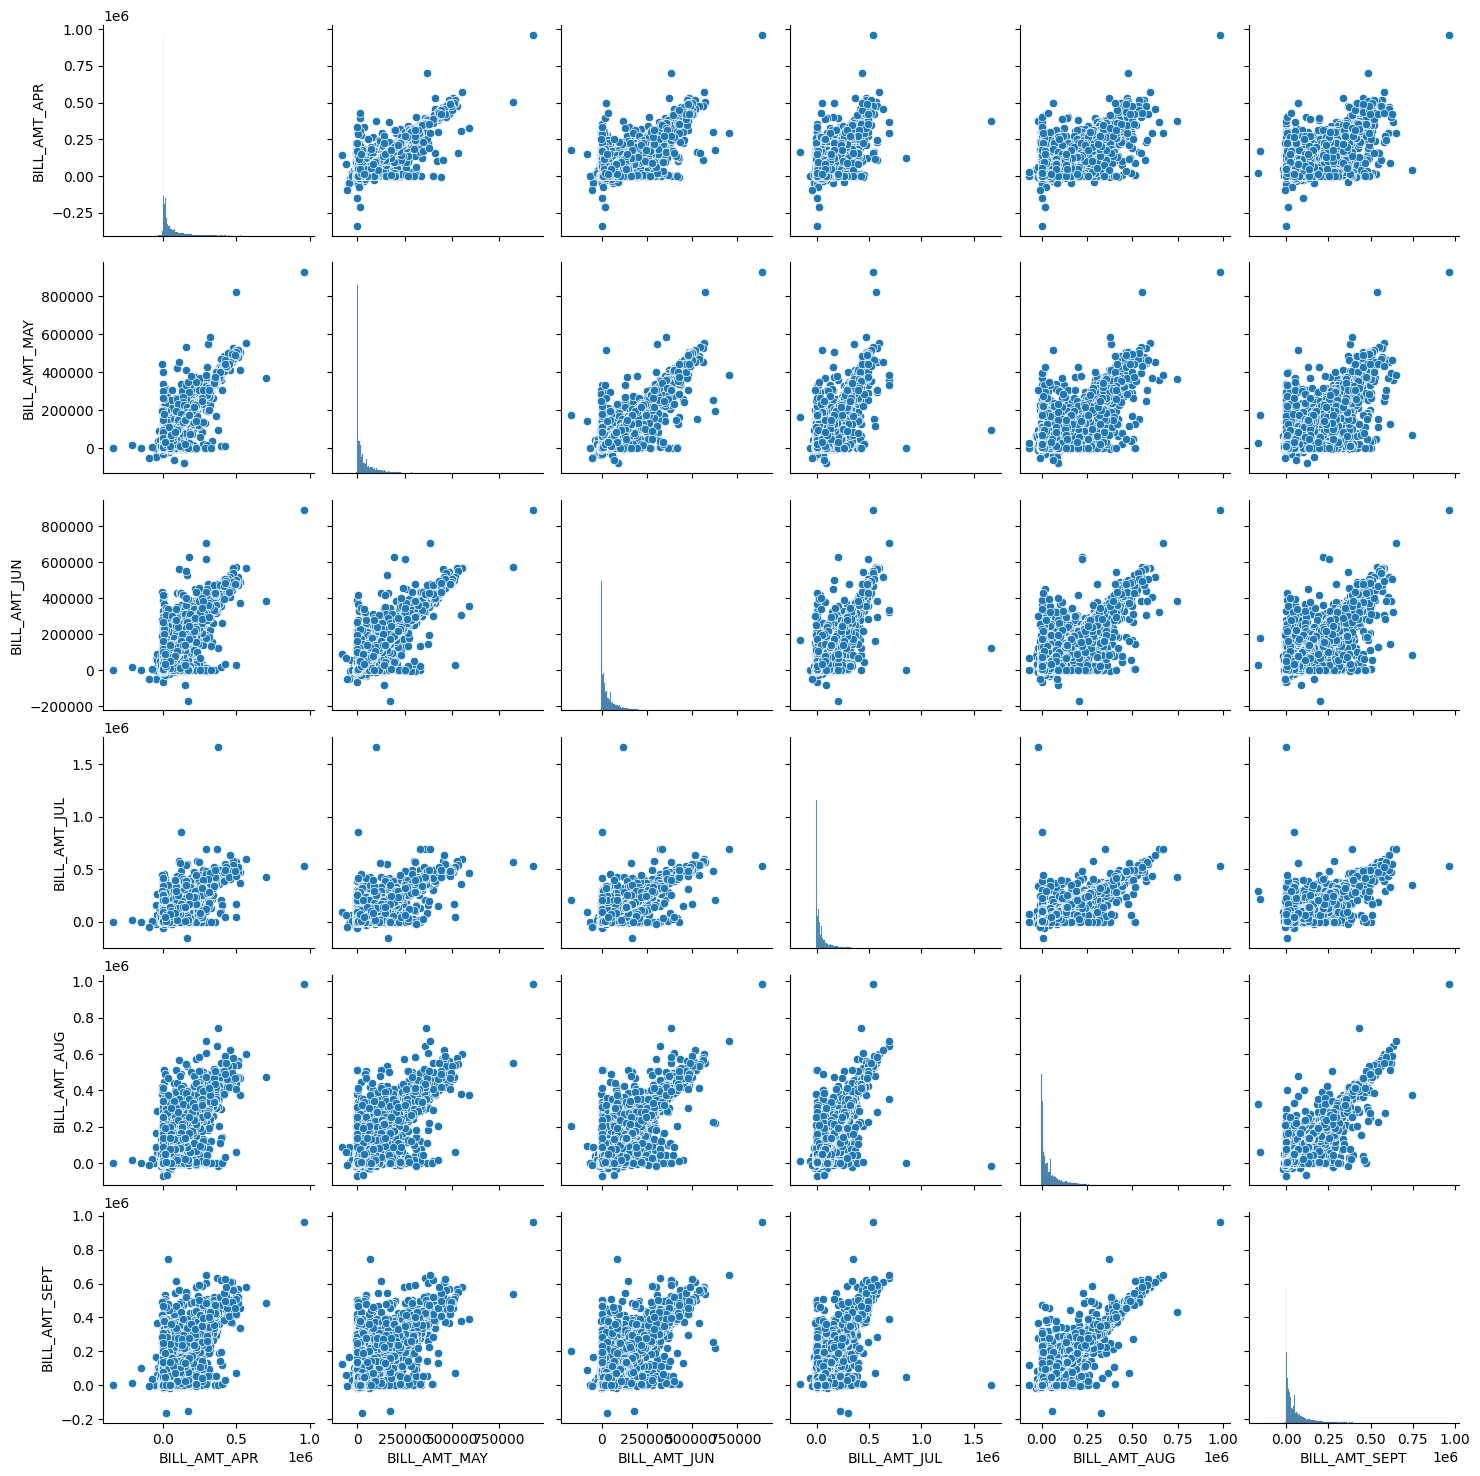

In [ ]:
bill_amount=df[['BILL_AMT_APR',  'BILL_AMT_MAY',   'BILL_AMT_JUN',   'BILL_AMT_JUL',   'BILL_AMT_AUG',   'BILL_AMT_SEPT']]

sns.pairplot(data=bill_amount)
plt.show()

In [ ]:
df.groupby(['PAY_SEPT','Defaulter']).size()

PAY_SEPT  Defaulter
-2        0             2394
          1              365
-1        0             4732
          1              954
 0        0            12849
          1             1888
 1        0             2436
          1             1252
 2        0              823
          1             1844
 3        0               78
          1              244
 4        0               24
          1               52
 5        0               13
          1               13
 6        0                5
          1                6
 7        0                2
          1                7
 8        0                8
          1               11
dtype: int64

In [ ]:
df.groupby(['PAY_AUG','Defaulter']).size()

PAY_AUG  Defaulter
-2       0             3091
         1              691
-1       0             5084
         1              966
 0       0            13227
         1             2503
 1       0               23
         1                5
 2       0             1743
         1             2184
 3       0              125
         1              201
 4       0               49
         1               50
 5       0               10
         1               15
 6       0                3
         1                9
 7       0                8
         1               12
 8       0                1
dtype: int64

In [ ]:
df.groupby(['PAY_JUL','Defaulter']).size()

PAY_JUL  Defaulter
-2       0             3328
         1              757
-1       0             5012
         1              926
 0       0            13013
         1             2751
 1       0                3
         1                1
 2       0             1850
         1             1969
 3       0              102
         1              138
 4       0               32
         1               44
 5       0                9
         1               12
 6       0                9
         1               14
 7       0                5
         1               22
 8       0                1
         1                2
dtype: int64

In [ ]:
df.groupby(['PAY_JUN','Defaulter']).size()

PAY_JUN  Defaulter
-2       0             3511
         1              837
-1       0             4783
         1              904
 0       0            13439
         1             3016
 1       0                1
         1                1
 2       0             1506
         1             1653
 3       0               70
         1              110
 4       0               23
         1               46
 5       0               17
         1               18
 6       0                3
         1                2
 7       0               10
         1               48
 8       0                1
         1                1
dtype: int64

In [ ]:
df.groupby(['PAY_MAY','Defaulter']).size()

PAY_MAY  Defaulter
-2       0             3651
         1              895
-1       0             4642
         1              897
 0       0            13752
         1             3195
 2       0             1203
         1             1423
 3       0               65
         1              113
 4       0               33
         1               51
 5       0                7
         1               10
 6       0                1
         1                3
 7       0               10
         1               48
 8       1                1
dtype: int64

In [ ]:
df.groupby(['PAY_APR','Defaulter']).size()

PAY_APR  Defaulter
-2       0             3914
         1              981
-1       0             4765
         1              975
 0       0            13217
         1             3069
 2       0             1365
         1             1401
 3       0               66
         1              118
 4       0               18
         1               31
 5       0                6
         1                7
 6       0                5
         1               14
 7       0                8
         1               38
 8       1                2
dtype: int64

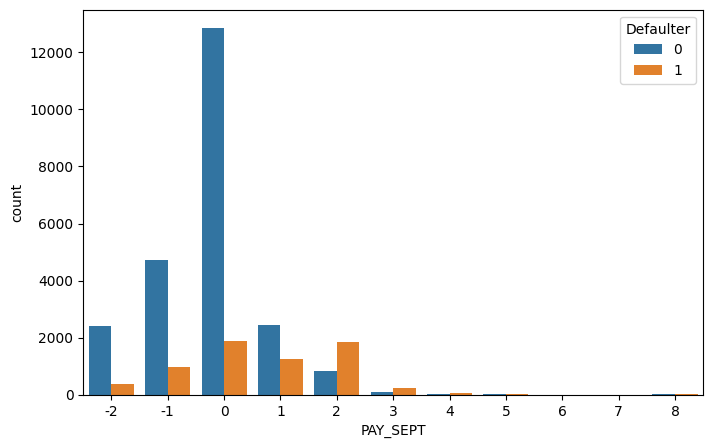

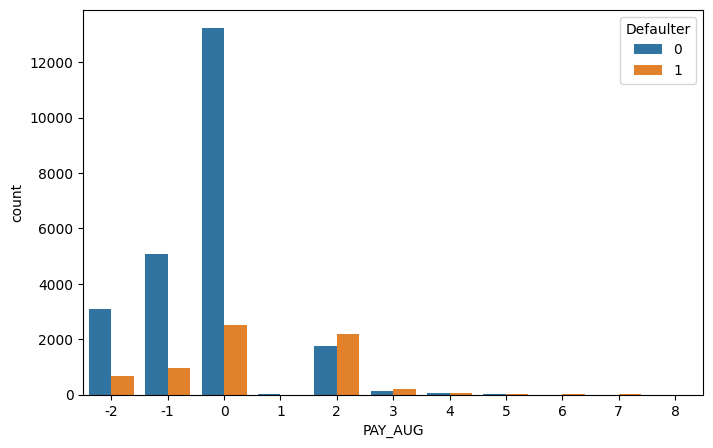

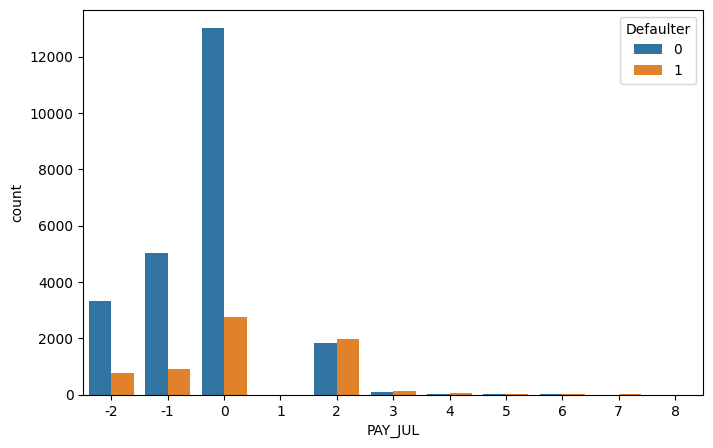

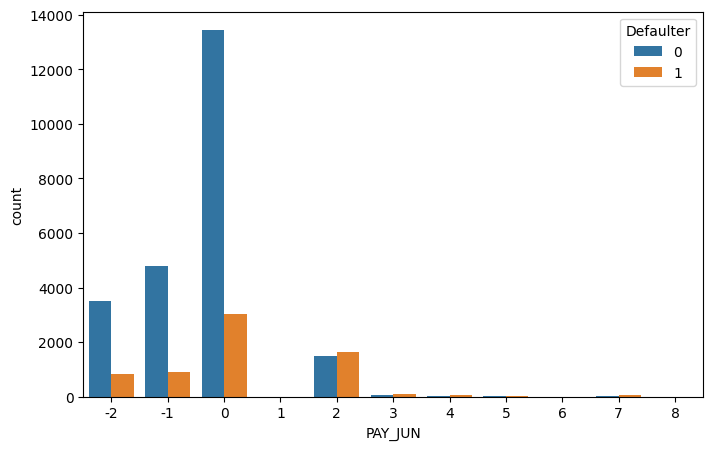

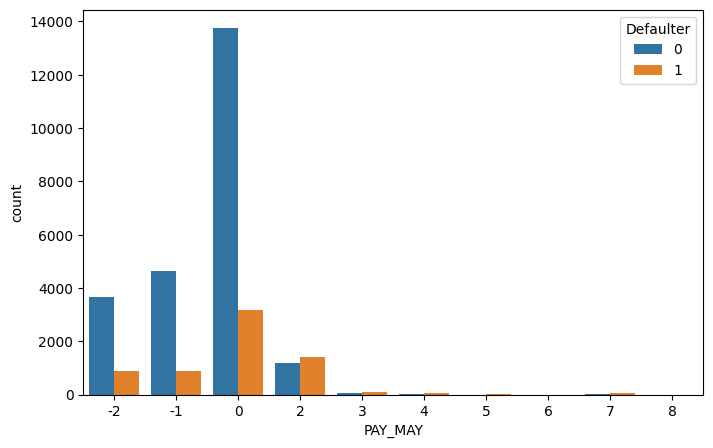

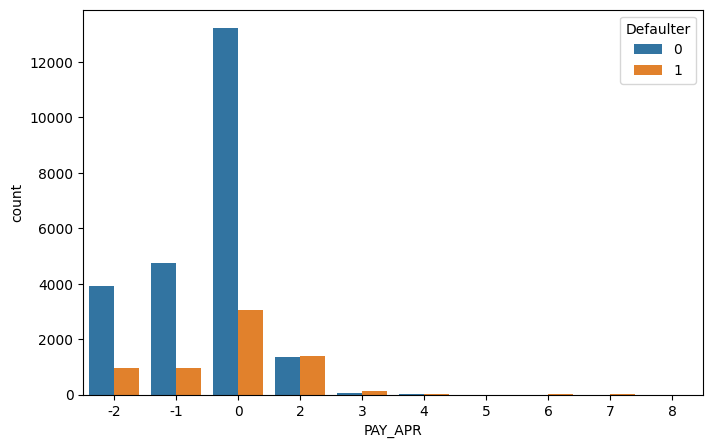

In [ ]:
payment=["PAY_SEPT",   "PAY_AUG", "PAY_JUL",  "PAY_JUN",  "PAY_MAY",  "PAY_APR"]

for col in payment:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col, hue="Defaulter" , data= df)

In [ ]:
pay_amount = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR']]

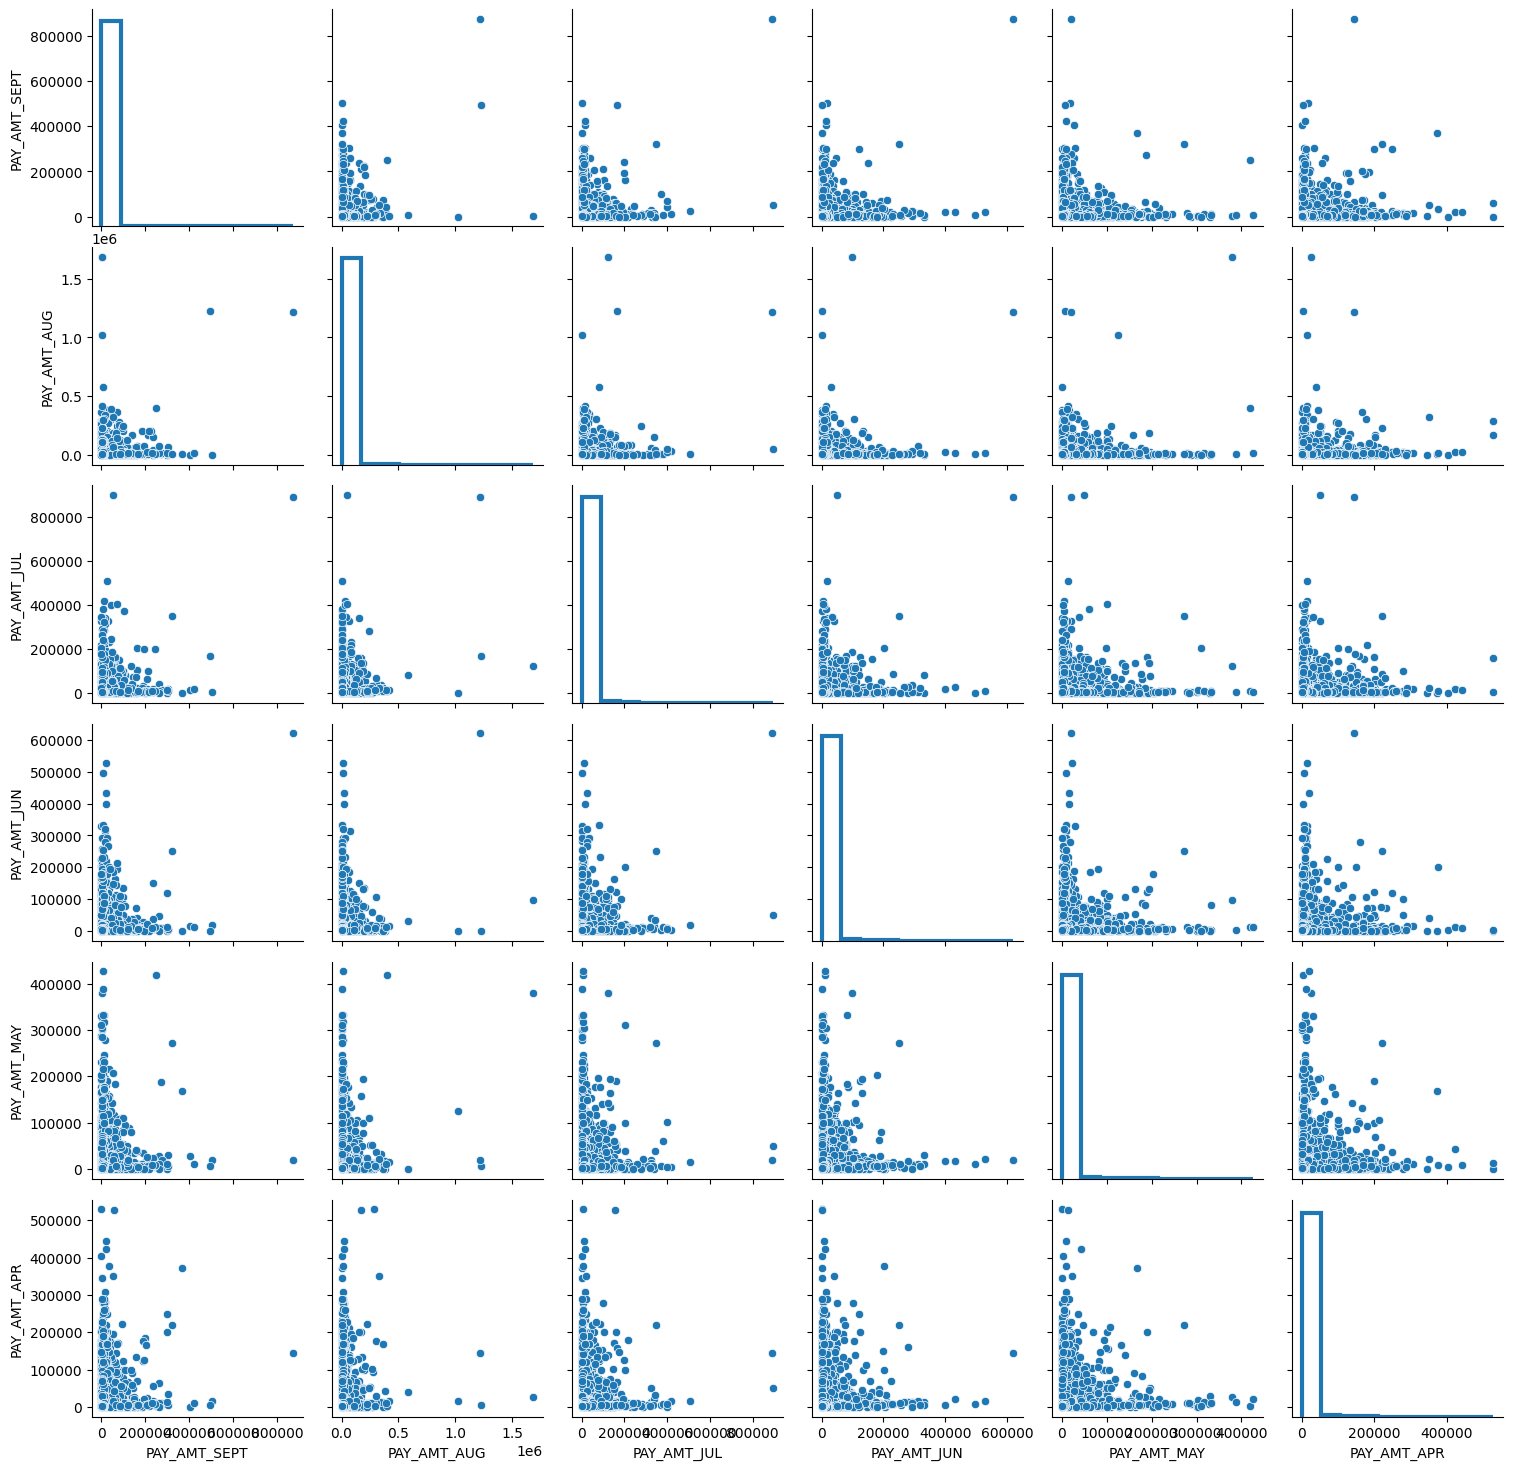

In [ ]:
g=sns.PairGrid(pay_amount  ,palette="bright")
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(plt.hist, histtype="step",linewidth=3)
g.add_legend()

In [ ]:
df.groupby(['SEX','Defaulter']).size()

SEX  Defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
dtype: int64

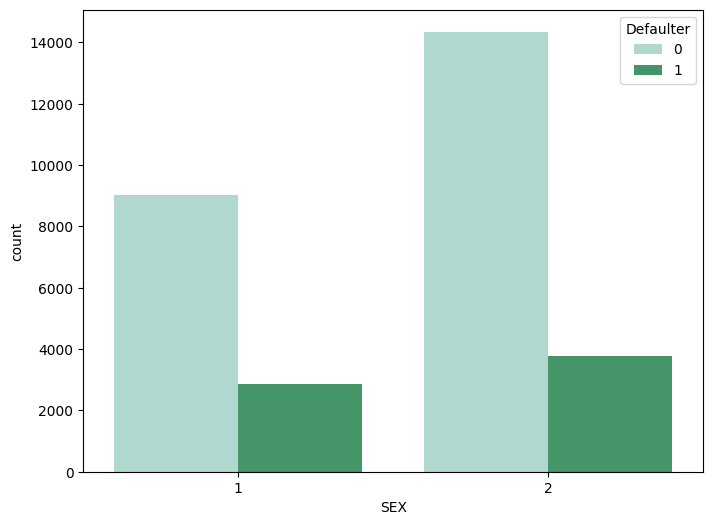

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='SEX',hue='Defaulter',data=df,palette='BuGn')
plt.show()

From the above figure we can conclude that defaultres were females, their number was 3763 and Height Non- defaultrs also famales it's number 14,349

In [ ]:


df.groupby(['EDUCATION','Defaulter']).size()


EDUCATION  Defaulter
0          0               14
1          0             8549
           1             2036
2          0            10700
           1             3330
3          0             3680
           1             1237
4          0              116
           1                7
5          0              262
           1               18
6          0               43
           1                8
dtype: int64

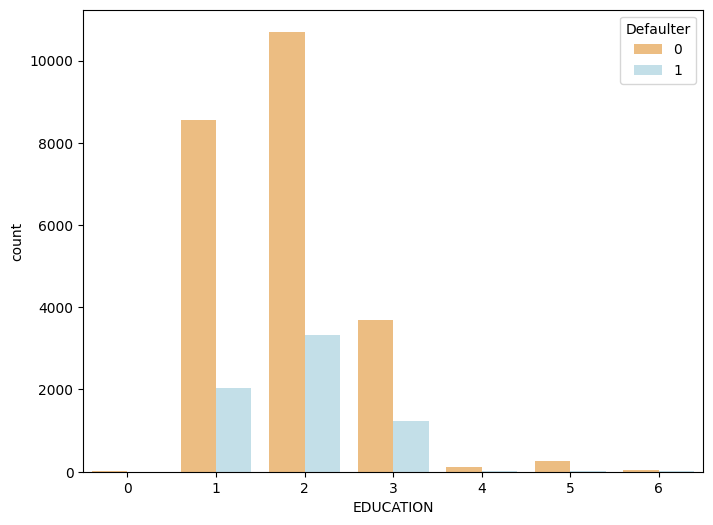

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='EDUCATION',hue='Defaulter',data=df,palette='RdYlBu')
plt.show()

From the above data we can conclude that most of the defaulters who did study in University people its number was 3,330 and after that graduate school people are defaulter their number was 2036.

In [ ]:
df.groupby(['MARRIAGE','Defaulter']).size()

MARRIAGE  Defaulter
1         0            10453
          1             3206
2         0            12623
          1             3341
3         0              288
          1               89
dtype: int64

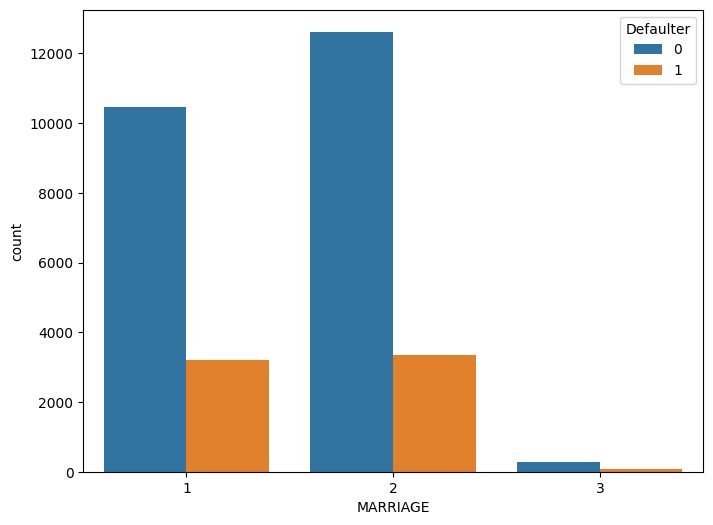

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='MARRIAGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that most of the defaulters were singles their numbers was 3341 and defaulters in married people were 3206 and defaulters in others were 89

In [ ]:
df.groupby(['AGE','Defaulter']).size()

AGE  Defaulter
21   0             53
     1             14
22   0            391
     1            169
23   0            684
                 ... 
73   1              3
74   0              1
75   0              2
     1              1
79   0              1
Length: 109, dtype: int64

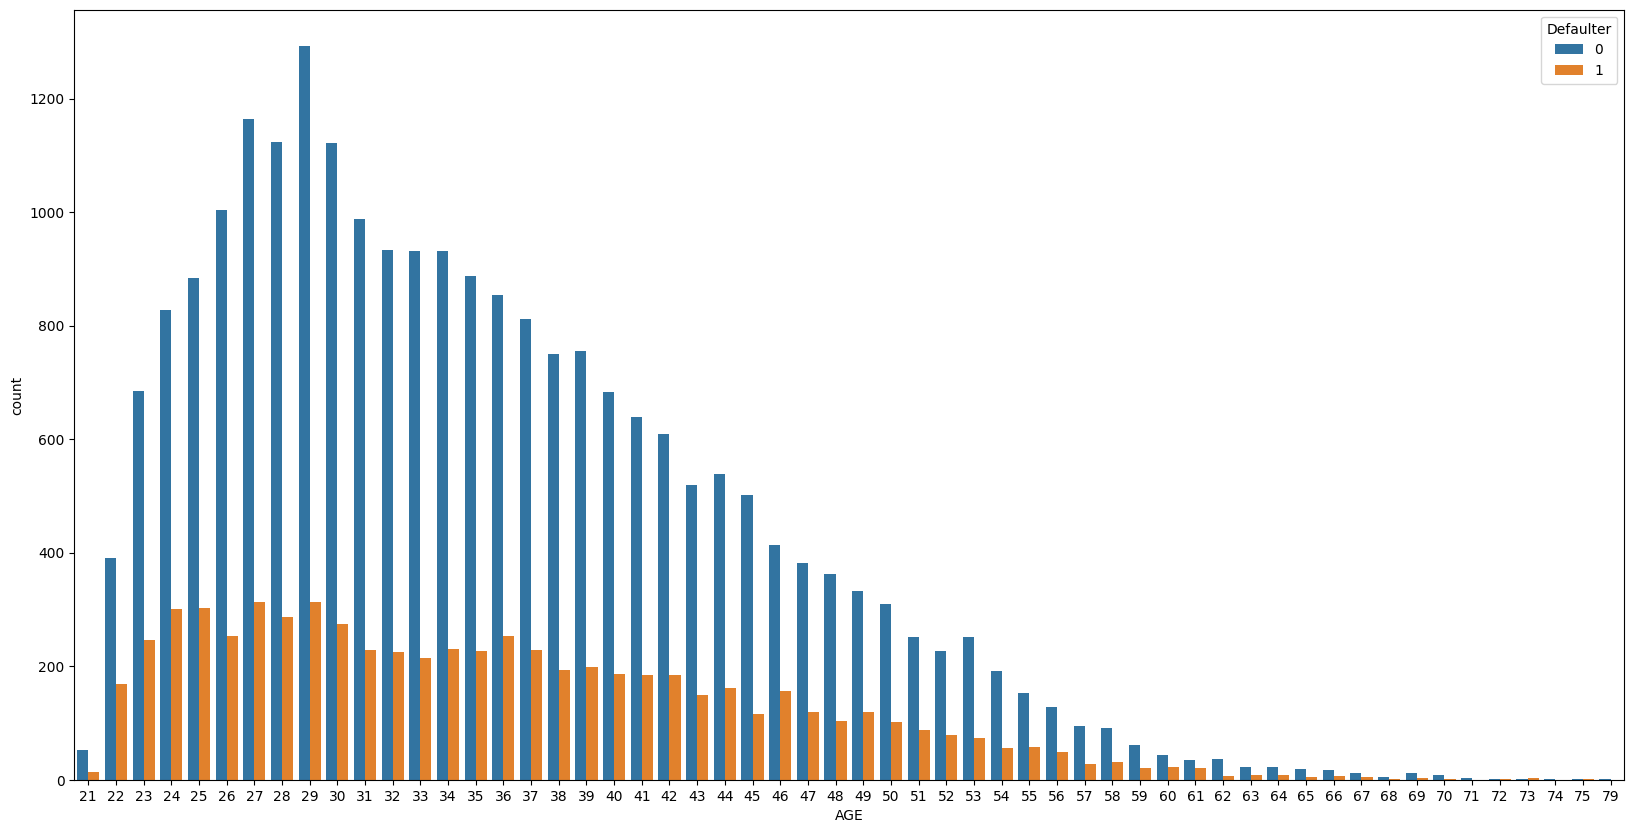

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x='AGE',hue='Defaulter',data=df)
plt.show()

From the above data we can conclude that

1.most of the 27th age people defaulters

2.least defaulters were above 60age people were defaulters

In [ ]:
df.head(1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


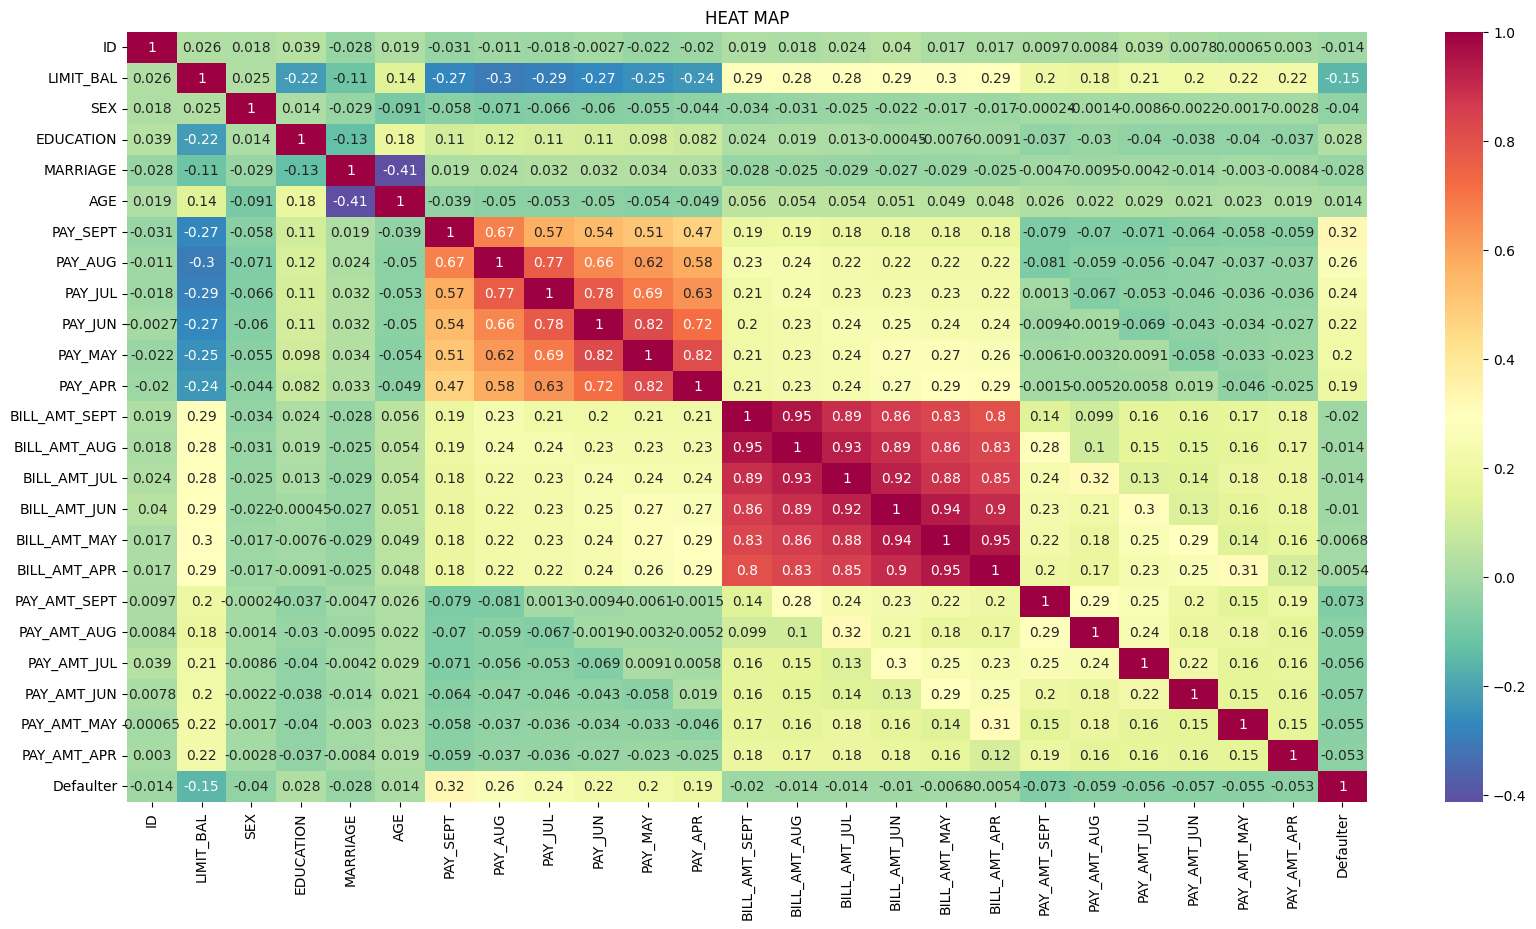

In [ ]:
plt.figure (figsize= (20,10))
corelation= df.corr()
sns.heatmap(corelation, annot=True, cmap='Spectral_r')
plt.title("HEAT MAP")
plt.show()

From the above heatmap we can conclude that correlationship between anytwo columns ,some part of data having positive HIGHLY correlation , some part of data having negative correlation , some part of data shows zero correlation AND those who are multicolinear are need to remove Highely correlated items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [ ]:
# dropping unimportant column of ID
df.drop(['ID'], axis=1, inplace=True)

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
# finding multicollinear and dropout that value
calc_vif(df[[i for i in df.describe().columns if i not in ["BILL_AMT_SEPT","PAY_SEPT","PAY_AMT_SEPT"]]])

,variables,VIF
0,LIMIT_BAL,3.995421
1,SEX,9.106067
2,EDUCATION,6.737846
3,MARRIAGE,6.346142
4,AGE,11.045478
5,PAY_AUG,2.688614
6,PAY_JUL,3.682997
7,PAY_JUN,4.426558
8,PAY_MAY,4.983905
9,PAY_APR,3.460470


Highely correlated items "PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" removed

In [ ]:
df['Payement_Value'] = df['PAY_SEPT'] + df['PAY_AUG'] + df['PAY_JUL'] + df['PAY_JUN'] + df['PAY_MAY']

In [ ]:
df.drop(["PAY_SEPT","BILL_AMT_SEPT","PAY_AMT_SEPT" ],axis=1,inplace=True)

In [ ]:
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64



Here dataset is imbalanced dataset so we need to do the balance using SMOTE



In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter,Payement_Value
0,20000,2,2,1,24,2,-1,-1,-2,-2,...,0,0,0,689,0,0,0,0,1,0
1,120000,2,2,2,26,2,0,0,0,2,...,3272,3455,3261,1000,1000,1000,0,2000,1,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1500,1000,1000,1000,5000,0,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2019,1200,1100,1069,1000,0,0
4,50000,1,2,1,57,0,-1,0,0,0,...,20940,19146,19131,36681,10000,9000,689,679,0,-2


Feature Engineering

ONE HOT ENCODING

In [ ]:
df = pd.get_dummies(df,columns=['SEX','MARRIAGE',"EDUCATION"])

In [ ]:
df.head(1)

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
df.shape

(30000, 31)

In [ ]:
# creating dependent variable and independent variable
independendent_variable=df.drop(['Defaulter'],axis=1)

dependent_variable=df['Defaulter']

In [ ]:
X=independendent_variable
y=dependent_variable

In [ ]:
X.head()

,LIMIT_BAL,AGE,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,...,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,EDUCATION_0,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6
0,20000,24,2,-1,-1,-2,-2,3102,689,0,...,1,0,0,0,0,1,0,0,0,0
1,120000,26,2,0,0,0,2,1725,2682,3272,...,0,1,0,0,0,1,0,0,0,0
2,90000,34,0,0,0,0,0,14027,13559,14331,...,0,1,0,0,0,1,0,0,0,0
3,50000,37,0,0,0,0,0,48233,49291,28314,...,1,0,0,0,0,1,0,0,0,0
4,50000,57,0,-1,0,0,0,5670,35835,20940,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
# spliting  unbalanced dataset  train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.20, random_state =17,stratify = y)
print(X_train.shape)
print(X_test.shape)

(24000, 30)
(6000, 30)


APPLYING SMOTE(Synthetic Minority Oversampling Technique)

In [ ]:
from imblearn.over_sampling import SMOTE

smote= SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X,y)

from collections import Counter
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_sm))
Counter(y_train_sm)

Original dataset shape Counter({0: 18691, 1: 5309})
Resample dataset shape Counter({1: 23364, 0: 23364})


Counter({1: 23364, 0: 23364})

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve,classification_report

In [ ]:
def print_metrics(actual, predicted):
  print('accuracy_score is {}'.format(accuracy_score(actual, predicted)))
  print(' precision_score is {}'.format( precision_score(actual, predicted)))

  print('recall_score is {}'.format(recall_score(actual, predicted)))
  print('f1_score is {}'.format(f1_score(actual, predicted)))
  print('roc_auc_score is {}'.format( roc_auc_score(actual , predicted)))
  print('confusion_matrix is {}'.format(confusion_matrix(actual , predicted)))
  print('classification_report is {}'.format(classification_report(actual , predicted)))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# spiliting  balanced dataset as training and testing  after applying SMOTE
X_train_os, X_test_os, y_train_os, y_test_os= train_test_split(X_train_sm,y_train_sm, test_size = 0.20, random_state = 17,stratify=y_train_sm)

In [ ]:
lr= LogisticRegression()

In [ ]:
# fitting logistic regression
param_grid = {'penalty':['l1','l2'], 'C' : [100,150,200] }

log_model= GridSearchCV(lr, param_grid, scoring = 'accuracy', cv =5)
log_model.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [100, 150, 200], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [ ]:
optimized_log=log_model.best_estimator_
optimized_log

LogisticRegression(C=150)

In [ ]:
log_model.best_params_


{'C': 150, 'penalty': 'l2'}

In [ ]:
log_model.best_score_

0.6159652361409661

In [ ]:
# model score  on training data
print(f"training_model_score:  {log_model.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {log_model.score(X_test_os,y_test_os)}")

training_model_score:  0.5928789256861591
testing_model_score:  0.5895570297453456


In [ ]:
# to predict the probability
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
y_test_pred = log_model.predict_proba(X_test_os)[:,1]

In [ ]:
y_train_pred

array([0.32681368, 0.37642685, 0.20604863, ..., 0.43108139, 0.51822988,
       0.30237671])

In [ ]:
y_test_pred

array([0.52816979, 0.31321032, 0.3499528 , ..., 0.40833763, 0.45808111,
       0.092946  ])

Here the probability said about the NON-Defaulter and defaulters

In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds = log_model.predict(X_train_os)
y_test_class_preds = log_model.predict(X_test_os)

In [ ]:
y_test_class_preds


array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds)

accuracy_score is 0.5928789256861591
 precision_score is 0.628993906969832
recall_score is 0.45289176609063186
f1_score is 0.5266104699990668
roc_auc_score is 0.5928789256861592
confusion_matrix is [[13698  4993]
 [10226  8465]]
classification_report is               precision    recall  f1-score   support

           0       0.57      0.73      0.64     18691
           1       0.63      0.45      0.53     18691

    accuracy                           0.59     37382
   macro avg       0.60      0.59      0.58     37382
weighted avg       0.60      0.59      0.58     37382



[[13698  4993]
 [10226  8465]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

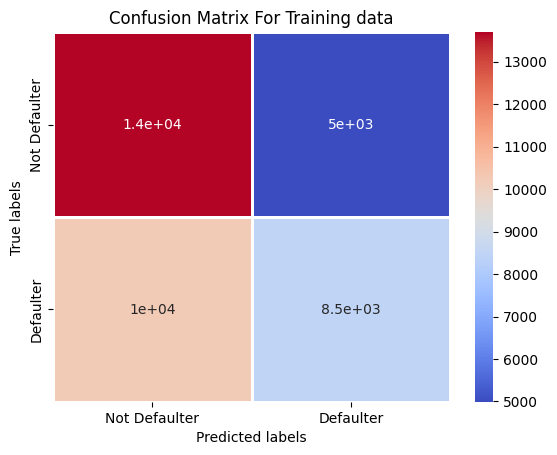

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

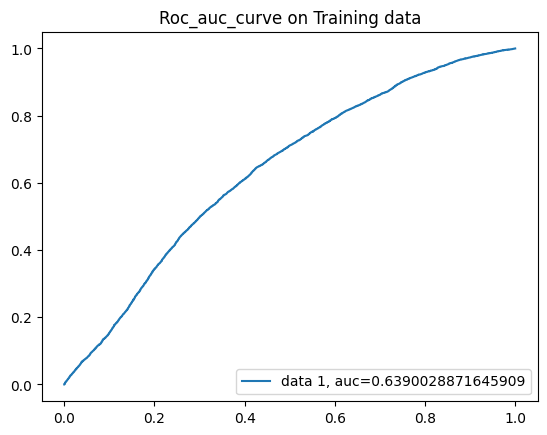

In [ ]:
# Roc_auc_curve
y_train_pred = log_model.predict_proba(X_train_os)[:,1]
fpr, tpr, _ = roc_curve(y_train_os,  y_train_pred )
auc = roc_auc_score(y_train_os,  y_train_pred  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds)

accuracy_score is 0.5895570297453456
 precision_score is 0.6218340611353712
recall_score is 0.4570939439332335
f1_score is 0.5268870251603355
roc_auc_score is 0.5895570297453456
confusion_matrix is [[3374 1299]
 [2537 2136]]
classification_report is               precision    recall  f1-score   support

           0       0.57      0.72      0.64      4673
           1       0.62      0.46      0.53      4673

    accuracy                           0.59      9346
   macro avg       0.60      0.59      0.58      9346
weighted avg       0.60      0.59      0.58      9346



[[3374 1299]
 [2537 2136]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

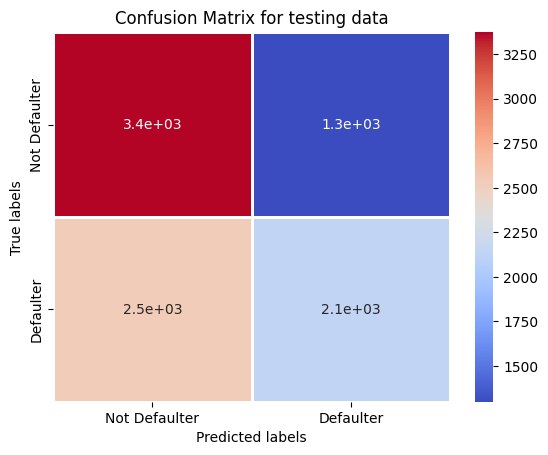

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix for testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

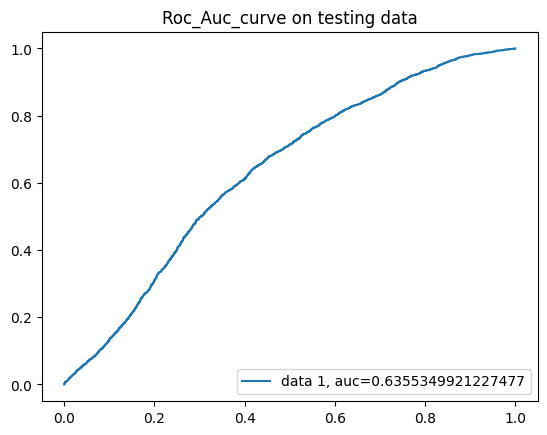

In [ ]:
# Roc_auc_curve
y_test_proba= log_model.predict_proba(X_test_os)[:,1]
fpr, tpr, _ = roc_curve(y_test_os,  y_test_proba )
auc = roc_auc_score(y_test_os, y_test_proba )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_Auc_curve on testing data")
plt.legend(loc=4)
plt.show()

We have implemented logistic regression and we getting accuracy_score is approx 62%. and precision score approx is 62% and f1_score is 62%and roc_auc approx is 62% As we have imbalanced dataset, recall_score is approx 63% better parameter. Let's go ahead with other models and see if they can give better result.

**Implementing Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
rf= RandomForestClassifier()
grid_values = {'n_estimators':[50,60,70,80,90,100], 'max_depth':[3, 5, 7,9,11,14]}
rf_grid = GridSearchCV(rf, param_grid = grid_values, scoring = 'accuracy', cv=5)

# Fit the object to train dataset
rf_grid.fit(X_train_os, y_train_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 14],
                         'n_estimators': [50, 60, 70, 80, 90, 100]},
             scoring='accuracy')

In [ ]:
rf_grid.best_params_

{'max_depth': 14, 'n_estimators': 100}

In [ ]:
optimized_rf=rf_grid.best_estimator_
optimized_rf

RandomForestClassifier(max_depth=14)

In [ ]:
rf_grid.best_score_


0.8616448100910565

In [ ]:
# model score  on training data
print(f"training_model_score:  {rf_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {rf_grid.score(X_test_os,y_test_os)}")


training_model_score:  0.9295917821411375
testing_model_score:  0.859940081318211


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_rf = rf_grid.predict(X_train_os)
y_test_class_preds_rf = rf_grid.predict(X_test_os)

In [ ]:
y_test_class_preds_rf

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test

10867    0
14863    0
26562    0
14294    1
26330    0
        ..
19576    0
2473     0
10168    0
29686    0
12215    0
Name: Defaulter, Length: 6000, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_rf)

accuracy_score is 0.9295917821411375
 precision_score is 0.9717962277454609
recall_score is 0.8848643732277567
f1_score is 0.9262951554186503
roc_auc_score is 0.9295917821411375
confusion_matrix is [[18211   480]
 [ 2152 16539]]
classification_report is               precision    recall  f1-score   support

           0       0.89      0.97      0.93     18691
           1       0.97      0.88      0.93     18691

    accuracy                           0.93     37382
   macro avg       0.93      0.93      0.93     37382
weighted avg       0.93      0.93      0.93     37382



[[18211   480]
 [ 2152 16539]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

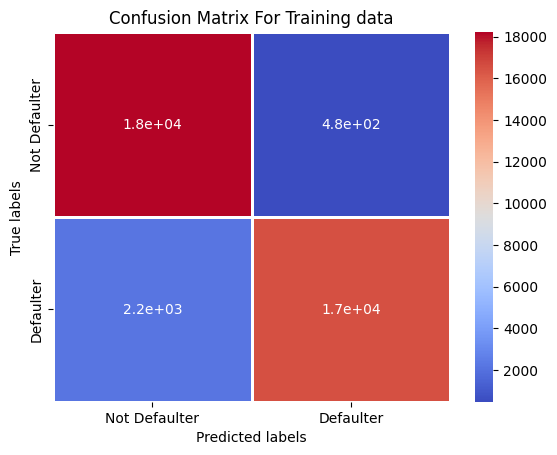

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

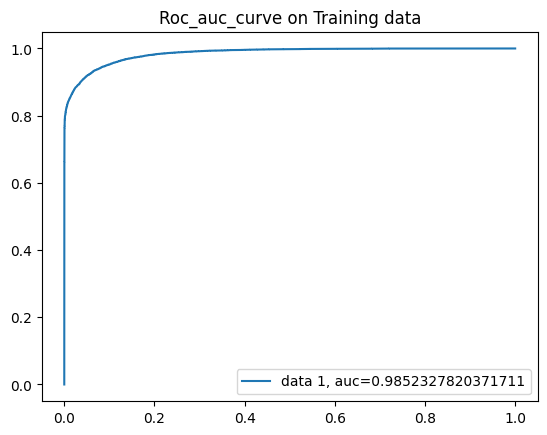

In [ ]:
# Roc_auc_curve
y_train_preds_proba_rf = rf_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_rf )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_rf)

accuracy_score is 0.859940081318211
 precision_score is 0.8915270018621974
recall_score is 0.8196019687566873
f1_score is 0.8540528487010814
roc_auc_score is 0.859940081318211
confusion_matrix is [[4207  466]
 [ 843 3830]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.90      0.87      4673
           1       0.89      0.82      0.85      4673

    accuracy                           0.86      9346
   macro avg       0.86      0.86      0.86      9346
weighted avg       0.86      0.86      0.86      9346



[[4207  466]
 [ 843 3830]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

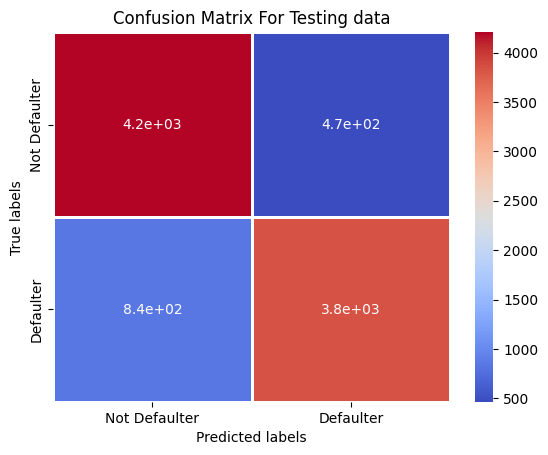

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_rf)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

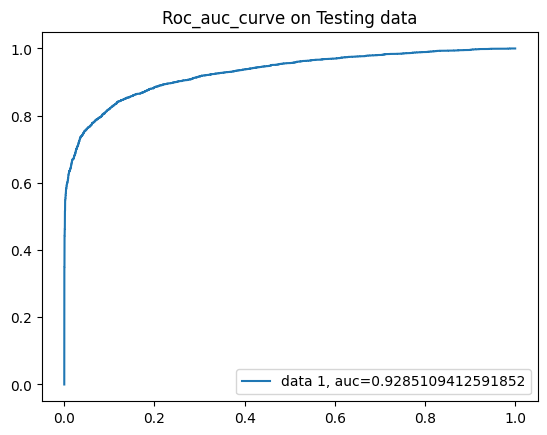

In [ ]:
# Roc_auc_curve
y_test_preds_proba_rf = rf_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_rf )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_rf  )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

Implementing KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid, scoring = 'accuracy',cv=3)
knn_cv.fit(X_train_os,y_train_os)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                         16, 17, 18, 19, 20]},
             scoring='accuracy')

In [ ]:
knn_cv.best_score_

0.7069981295091731

In [ ]:
knn_cv.best_params_

{'n_neighbors': 5}

In [ ]:
optimized_knn=knn_cv.best_estimator_
optimized_knn

KNeighborsClassifier()

In [ ]:
# model score  on training data
print(f"training_model_score:  {knn_cv.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {knn_cv.score(X_test_os,y_test_os)}")

training_model_score:  0.8313894387673212
testing_model_score:  0.7404237106783651


In [ ]:
# to predict the classes either 1 or 0
# Get the predicted classes
y_train_class_preds_knn = knn_cv.predict(X_train_os)
y_test_class_preds_knn = knn_cv.predict(X_test_os)

In [ ]:
y_test_class_preds_knn

array([1, 1, 0, ..., 1, 1, 0])

In [ ]:
y_test_os

38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_knn)

accuracy_score is 0.8313894387673212
 precision_score is 0.7749223257878385
recall_score is 0.9340859237065967
f1_score is 0.84709250139492
roc_auc_score is 0.8313894387673211
confusion_matrix is [[13620  5071]
 [ 1232 17459]]
classification_report is               precision    recall  f1-score   support

           0       0.92      0.73      0.81     18691
           1       0.77      0.93      0.85     18691

    accuracy                           0.83     37382
   macro avg       0.85      0.83      0.83     37382
weighted avg       0.85      0.83      0.83     37382



[[13620  5071]
 [ 1232 17459]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

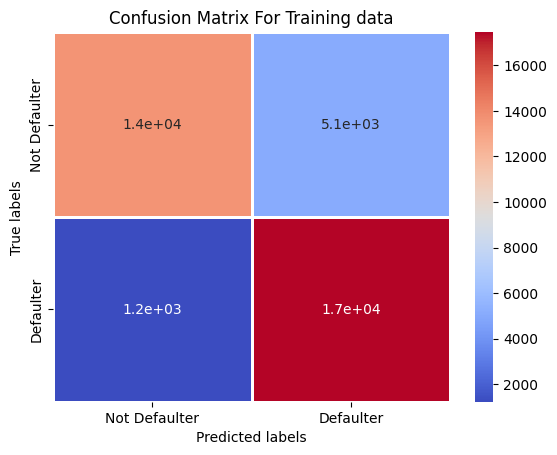

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

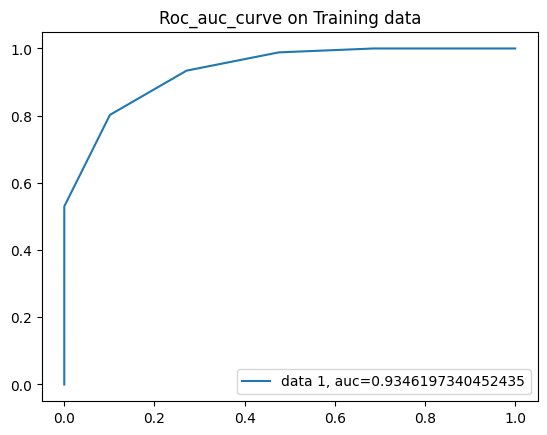

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_knn = knn_cv.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_knn )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_knn)

accuracy_score is 0.7404237106783651
 precision_score is 0.6905852417302799
recall_score is 0.8711748341536486
f1_score is 0.770439061317184
roc_auc_score is 0.7404237106783651
confusion_matrix is [[2849 1824]
 [ 602 4071]]
classification_report is               precision    recall  f1-score   support

           0       0.83      0.61      0.70      4673
           1       0.69      0.87      0.77      4673

    accuracy                           0.74      9346
   macro avg       0.76      0.74      0.74      9346
weighted avg       0.76      0.74      0.74      9346



[[2849 1824]
 [ 602 4071]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

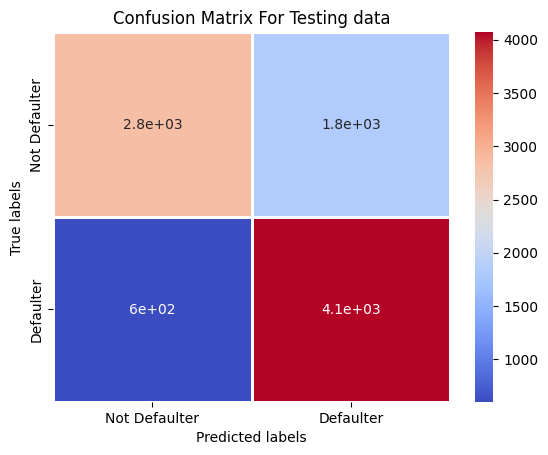

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_knn)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

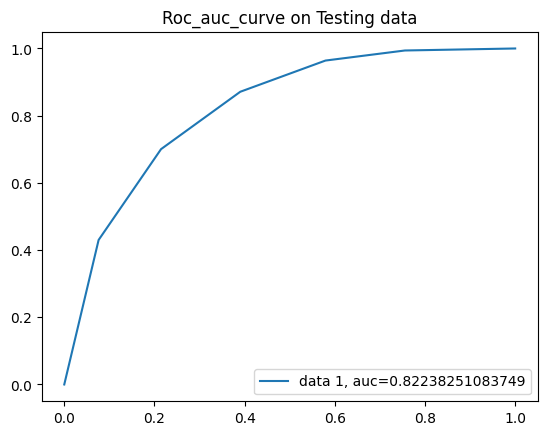

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_knn = knn_cv.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_knn )
auc = roc_auc_score(y_test_os,  y_test_preds_proba_knn )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented KNN and we getting accuracy_score is approx 75%. and precision score is approx 70% and f1_score is 76% and ROC_AUC score is 75% ,recall_score is approx 88% better parameter

Implementing XG boost Algorithm

In [ ]:
from xgboost import  XGBClassifier

In [ ]:
param_test1 = {
 'max_depth':range(2,3,6),
 'min_child_weight':range(1,2,6)}

In [ ]:
# xg boost with grid search cv
xgb_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=100, max_depth=5,
 min_child_weight=1 ,objective= 'binary:logistic'),
 param_grid = param_test1, scoring='roc_auc', cv=3)

In [ ]:
xgb_grid.fit(X_train_os,y_train_os)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(2, 3, 6),
                         'min_child_weight': range(1, 2, 6)},
             scoring='roc_auc')

In [ ]:
xgb_grid.best_params_

{'max_depth': 2, 'min_child_weight': 1}

In [ ]:
optimized_xgb=xgb_grid.best_estimator_
optimized_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
xgb_grid.best_score_

0.911978565061036

In [ ]:
# model score  on training data
print(f"training_model_score:  {xgb_grid.score(X_train_os,y_train_os )}")

# model score on testing data
print(f"testing_model_score:  {xgb_grid.score(X_test_os,y_test_os)}")

training_model_score:  0.9134416081573264
testing_model_score:  0.9081894940446984


In [ ]:
# Get the predicted classes
y_train_class_preds_xgb = xgb_grid.predict(X_train_os)
y_test_class_preds_xgb = xgb_grid.predict(X_test_os)

In [ ]:
y_test_class_preds_xgb

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
y_test_os


38707    1
26884    1
19454    0
12363    0
4518     0
        ..
19740    0
35793    1
32857    1
17947    0
1027     0
Name: Defaulter, Length: 9346, dtype: int64

In [ ]:
# Evaluation of training model
print_metrics(y_train_os,y_train_class_preds_xgb)

accuracy_score is 0.8452731261034723
 precision_score is 0.8850766752192851
recall_score is 0.7935904981006902
f1_score is 0.8368406205923837
roc_auc_score is 0.8452731261034723
confusion_matrix is [[16765  1926]
 [ 3858 14833]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.90      0.85     18691
           1       0.89      0.79      0.84     18691

    accuracy                           0.85     37382
   macro avg       0.85      0.85      0.84     37382
weighted avg       0.85      0.85      0.84     37382



[[16765  1926]
 [ 3858 14833]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

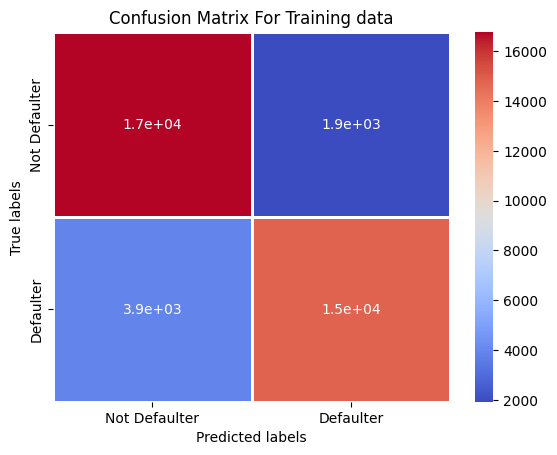

In [ ]:
# Get the confusion matrix for  training  data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train_os,y_train_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Training data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

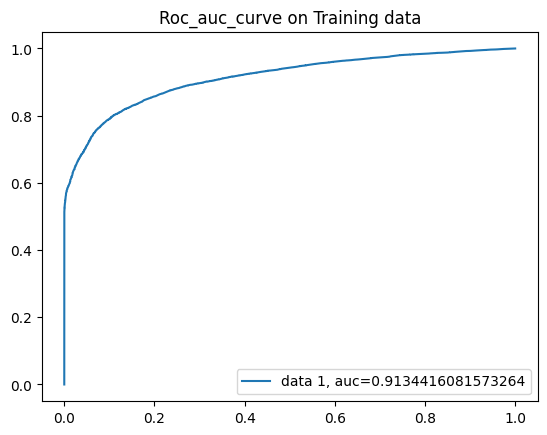

In [ ]:
# Roc_auc_curve on taining data
y_train_preds_proba_xgb = xgb_grid.predict_proba(X_train_os)[::,1]

fpr, tpr, _ = roc_curve(y_train_os,  y_train_preds_proba_xgb )
auc = roc_auc_score(y_train_os,  y_train_preds_proba_xgb )
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Training data")
plt.legend(loc=4)
plt.show()

In [ ]:
# Evaluation of testing model
print_metrics(y_test_os,y_test_class_preds_xgb)

accuracy_score is 0.8397175262144233
 precision_score is 0.87698883875564
recall_score is 0.7902846137384978
f1_score is 0.8313822602431338
roc_auc_score is 0.8397175262144233
confusion_matrix is [[4155  518]
 [ 980 3693]]
classification_report is               precision    recall  f1-score   support

           0       0.81      0.89      0.85      4673
           1       0.88      0.79      0.83      4673

    accuracy                           0.84      9346
   macro avg       0.84      0.84      0.84      9346
weighted avg       0.84      0.84      0.84      9346



[[4155  518]
 [ 980 3693]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

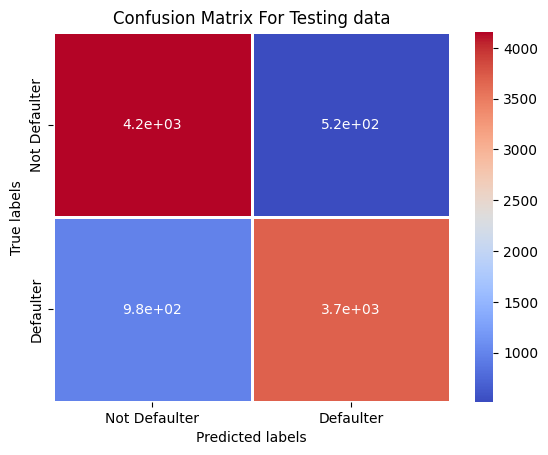

In [ ]:
# Get the confusion matrix for  testing data
labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test_os,y_test_class_preds_xgb)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, linewidths=1, cmap='coolwarm',ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix For Testing data')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

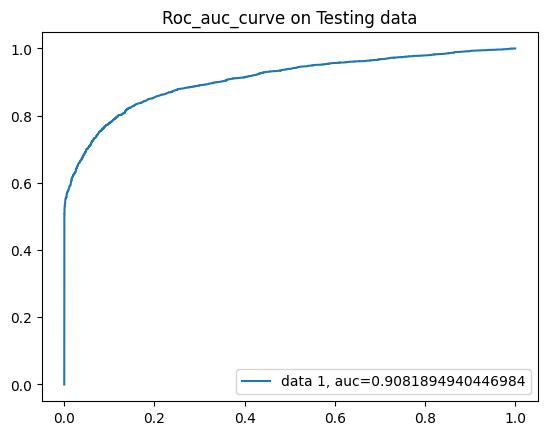

In [ ]:
# Roc_auc_curve testing data
y_test_preds_proba_xgb = xgb_grid.predict_proba(X_test_os)[::,1]

fpr, tpr, _ = roc_curve(y_test_os,  y_test_preds_proba_xgb)
auc = roc_auc_score(y_test_os,  y_test_preds_proba_xgb)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.title("Roc_auc_curve on Testing data")
plt.legend(loc=4)
plt.show()

We have implemented XGBOOST WITH GRID SEARCH CV and we getting accuracy_score is approx 84%. and recall_score is approx 78% and f1_score is 83% and ROC_AUC score is 84% ,precision score is approx 89% better parameter

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train accuracy_score ", "Train Precision_score", "Train Recall_score","Train f1_score",'Train ROC_AUC_Score'])
train.add_row(['1','Logistic Regression','0.6177572093520945','0.6144089822226843',' 0.6323899202824889','0.6232697935616546'," 0.6177572093520945"])
train.add_row(['2','Random_Forest_classifier',' 0.9318121020812156','0.9737614463489082','0.8875394574929111','0.9286533993898173'," 0.9318121020812155"])
train.add_row(['3','KNN_Classifier ','0.8327804825852014','0.7761498845675724','0.9353164624685678','0.8483319179910227',"0.8327804825852015"])
train.add_row(['4','XGBoost_Classifier','0.844818361778396','0.8935637518319492','0.7828901610400728','0.8345738158382526'," 0.8448183617783961"])

print(train)

+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
| SL NO |        MODEL_NAME        | Train accuracy_score  | Train Precision_score |  Train Recall_score |   Train f1_score   | Train ROC_AUC_Score |
+-------+--------------------------+-----------------------+-----------------------+---------------------+--------------------+---------------------+
|   1   |   Logistic Regression    |   0.6177572093520945  |   0.6144089822226843  |  0.6323899202824889 | 0.6232697935616546 |  0.6177572093520945 |
|   2   | Random_Forest_classifier |   0.9318121020812156  |   0.9737614463489082  |  0.8875394574929111 | 0.9286533993898173 |  0.9318121020812155 |
|   3   |     KNN_Classifier       |   0.8327804825852014  |   0.7761498845675724  |  0.9353164624685678 | 0.8483319179910227 |  0.8327804825852015 |
|   4   |    XGBoost_Classifier    |   0.844818361778396   |   0.8935637518319492  |  0.782890161040

In [ ]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test accuracy_score  ", "Test Precision_score","Test Recall_score","Test f1_score",'Test ROC_AUC_Score'])
test.add_row(['1','Logistic Regression','0.6196233682858977','0.6176346801346801','0.6280761823239889','0.6228116710875332',"0.6196233682858977"])
test.add_row(['2','Random_Forest_classifier','0.8607960624866253',' 0.896519285042333','0.815750053498823','0.8542296918767507',"0.8607960624866253"])
test.add_row(['3','KNN_Classifier ',' 0.7472715600256794','0.6969490369865349','0.8750267494115129','0.7759013282732449',"0.7472715600256794"])
test.add_row(['4','XGBOOST_Classifier',' 0.8400385191525787',' 0.8864299610894941','0.7800128397175262','0.829823562891292',"0.8400385191525788"])

print(test)

+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME        | Test accuracy_score   | Test Precision_score | Test Recall_score  |   Test f1_score    | Test ROC_AUC_Score |
+-------+--------------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+
|   1   |   Logistic Regression    |   0.6196233682858977  |  0.6176346801346801  | 0.6280761823239889 | 0.6228116710875332 | 0.6196233682858977 |
|   2   | Random_Forest_classifier |   0.8607960624866253  |   0.896519285042333  | 0.815750053498823  | 0.8542296918767507 | 0.8607960624866253 |
|   3   |     KNN_Classifier       |   0.7472715600256794  |  0.6969490369865349  | 0.8750267494115129 | 0.7759013282732449 | 0.7472715600256794 |
|   4   |    XGBOOST_Classifier    |   0.8400385191525787  |  0.8864299610894941  | 0.7800128397175262 | 0.82982356289

Conclusion We used diffent type of Classification algorithms to train our model like, Logistic Regression, Random Forest Classifier,KNN_Classifier, XGboost_Classifier. and Also we tuned the parameters of Random forest classifier and XGboost classifier ,KNN_ Out of them Random forest classifier ( tuned hyperparameters gave) the best result. it's Highest

Precision score is approx 90%,

Recall score is approx 82%

ROC_Auc score is approx 86%,

and Accuracy_score is approx 86%,

and It's F1_score approx is 85%